# Classificação 

## Introdução ao aprendizado por algoritimos 

Naive Bayes: gera uma tabela de probabilidade

In [62]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("credit_data.csv")
data.shape

(2000, 5)

In [6]:
data.head(-1)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1


In [9]:
#apagando valores nan
data.dropna(inplace =True)
data.shape

(1997, 5)

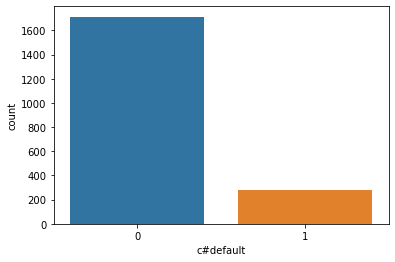

In [17]:
sns.countplot(data['c#default']);

In [26]:
# Classificação com dados desbalanceados
# carregamento base de dados
# atributos previsores
x = data.iloc[:,1:4].values #valores para previsão
x.shape
print(x)

[[6.61559251e+04 5.90170151e+01 8.10653213e+03]
 [3.44151540e+04 4.81171531e+01 6.56474502e+03]
 [5.73171701e+04 6.31080495e+01 8.02095330e+03]
 ...
 [4.43114493e+04 2.80171669e+01 5.52278669e+03]
 [4.37560566e+04 6.39717958e+01 1.62272260e+03]
 [6.94365796e+04 5.61526170e+01 7.37883360e+03]]


In [29]:
# classe
y = data.iloc[:,4].values #respostas
y.shape
print(y)

[0 0 0 ... 1 0 0]


In [36]:
# Divisão base treinamento e base de teste por amostra estratificada
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     stratify = y)


In [35]:
x_train.shape, y_train.shape

((1597, 3), (1597,))

In [37]:
x_test.shape, y_test.shape

((400, 3), (400,))

In [45]:
# Checagem da amostra estratif

# valores exatos de elementos em cada classe
print(np.unique(y, return_counts=True))

# proporção
print(1714 / len(data), 283 /len(data))

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))
0.8582874311467201 0.14171256885327993


In [49]:
# valores exatos train
print(np.unique(y_train, return_counts=True))

# proporção
print(1371/len(y_train), 226/len(y_train))


(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))
0.8584846587351284 0.14151534126487164
3.4275 0.565


In [54]:
# valores exatos train
print(np.unique(y_teste, return_counts=True))

# proporção
print(343/len(y_teste), 57/len(y_teste))

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))
0.8575 0.1425


In [56]:
#Classificação com Nave Bayes

modelo = GaussianNB()
modelo.fit(x_train, y_train)

GaussianNB()

In [58]:
prev = modelo.predict(x_test)
prev

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [59]:
#checagem da previsão
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [61]:
# verificação do percentual de acertos do algoritimo
accuracy_score(prev, y_test)

0.93

In [64]:
# Matriz de confusion
cf_matrix = confusion_matrix(prev, y_test)
cf_matrix

array([[335,  20],
       [  8,  37]], dtype=int64)

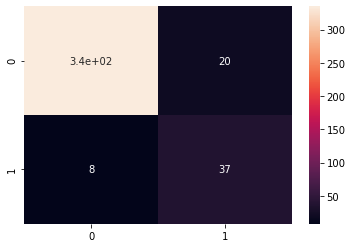

In [66]:
sns.heatmap(cf_matrix, annot=True);

In [70]:
# percentual de acerto para pessoas que pagam o emprestimo

print(336 / (336 + 25))

# percentual de acerto para pessoas que não pagam o emprestimo

print(32 / (32+7))

0.9307479224376731
0.8205128205128205


In [72]:
# perdas: 5000 a cada cliente inadimplente
# 1000 não pagadores
n_pag = (1000 * 18)  / 100
n_pag * 5000

#Conclusão: sistema de previsão dá um prejuízo de 900.000

# Buscar correções

900000.0